In [71]:
import matplotlib
matplotlib.use('Agg')
import numpy as np
import glob
import matplotlib.pyplot as plt
from autograd import grad
from PIL import Image, ImageOps
%matplotlib inline

c:\users\pawel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\pawel\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\pawel\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\pawel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\pawel\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()

In [72]:
def load_image(fname):
    img = Image.open(fname).resize((32, 32))
    img_gray = img.convert('L')
    img_eq = ImageOps.autocontrast(img_gray)
    img_eq = np.array(img_eq.getdata()).reshape((img_eq.size[1], -1))
    return img_eq


def binarize_image(img_eq):
    img_bin = np.copy(img_eq)
    img_bin[img_bin < 128] = -1
    img_bin[img_bin >= 128] = 1
    return img_bin


def add_corruption(img):
    img = img.reshape((32, 32))
    t = np.random.choice(3)
    if t == 0:
        i = np.random.randint(32)
        img[i:(i + 8)] = -1
    elif t == 1:
        i = np.random.randint(32)
        img[:, i:(i + 8)] = -1
    else:
        mask = np.sum([np.diag(-np.ones(32 - np.abs(i)), i)
                       for i in np.arange(-4, 5)], 0).astype(np.int)
        img[mask == -1] = -1
    return img.ravel()


def learn_hebbian(imgs):
    img_size = np.prod(imgs[0].shape)
    ######################################################################
    ######################################################################
    weights = np.zeros((img_size, img_size))
    bias = np.zeros(img_size)
    # Complete this function
    # You are allowed to modify anything between these lines
    # Helper functions are allowed
    #######################################################################
    #######################################################################
    return weights, bias

def sigm(x):
    return 1/(1+np.exp(-x))
    
    
def learn_maxpl(imgs):
    img_size = np.prod(imgs[0].shape)
    ######################################################################
    ######################################################################
    weights = np.zeros((img_size, img_size))
    bias = np.zeros(img_size)
    # Complete this function
    # You are allowed to modify anything between these lines
    # Helper functions are allowed
    
    for img in imgs:
        print(img.ravel())
    
    #######################################################################
    #######################################################################
    return weights, bias


def plot_results(imgs, cimgs, rimgs, fname='result.png'):
    '''
    This helper function can be used to visualize results.
    '''
    img_dim = 32
    #assert imgs.shape[0] == cimgs.shape[0] == rimgs.shape[0]
    n_imgs = imgs.shape[0]
    fig, axn = plt.subplots(n_imgs, 3, figsize=[8, 8])
    for j in range(n_imgs):
        axn[j][0].axis('off')
        axn[j][0].imshow(imgs[j].reshape(img_dim, img_dim), cmap='Greys_r')
    axn[0, 0].set_title('True')
    for j in range(n_imgs):
        axn[j][1].axis('off')
        axn[j][1].imshow(cimgs[j].reshape(img_dim, img_dim), cmap='Greys_r')
    axn[0, 1].set_title('Corrupted')
    for j in range(n_imgs):
        axn[j][2].axis('off')
        axn[j][2].imshow(rimgs[j].reshape((img_dim, img_dim)), cmap='Greys_r')
    axn[0, 2].set_title('Recovered')
    fig.tight_layout()
    plt.savefig(fname)

    
def recover(cimgs, W, b):
    img_size = np.prod(cimgs[0].shape)
    ######################################################################
    ######################################################################
    rimgs = np.array([])
    # Complete this function
    # You are allowed to modify anything between these lines
    # Helper functions are allowed
 
    # W -  for each pixel there must be a row of length num of pixels
    # b - size of num of pixels
    for cimg in cimgs:
        rimg = (sigm(W.dot(cimg) + b)>0.5)*2 -1
        rimgs.append(rimg)
    #######################################################################
    #######################################################################
    return rimgs


In [64]:
# Load Images and Binarize
ifiles = sorted(glob.glob('images/*'))
timgs = [load_image(ifile) for ifile in ifiles]
imgs = np.asarray([binarize_image(img) for img in timgs])

In [65]:
# Add corruption
cimgs = []
for i, img in enumerate(imgs):
    cimgs.append(add_corruption(np.copy(imgs[i])))
cimgs = np.asarray(cimgs)

In [66]:
# Recover 1 -- Hebbian
Wh, bh = learn_hebbian(imgs)
rimgs_h = recover(cimgs, Wh, bh)
np.save('hebbian.npy', rimgs_h)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [67]:
# Recover 2 -- Max Pseudo Likelihood
Wmpl, bmpl = learn_maxpl(imgs)
rimgs_mpl = recover(cimgs, Wmpl, bmpl)
np.save('mpl.npy', rimgs_mpl)

[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]


AttributeError: 'numpy.ndarray' object has no attribute 'append'

IndexError: index 0 is out of bounds for axis 0 with size 0

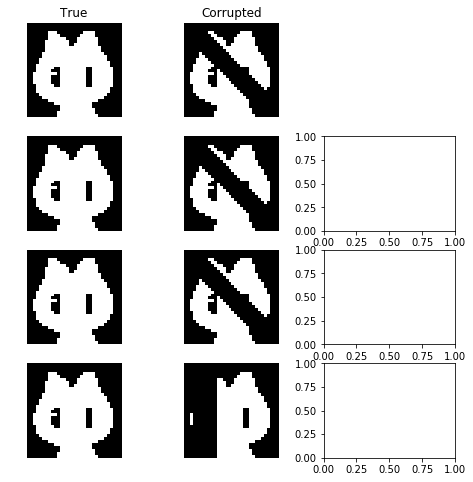

In [68]:
plot_results(imgs, cimgs, rimgs_mpl, fname='result.png')